In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt25 = "Make an rdf analysis of both oxygenated and deoxygenated hemoglobin structures"
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 14:50:21
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt25)

Thought: To perform an RDF (Radial Distribution Function) analysis of both oxygenated and deoxygenated hemoglobin structures, I need to first obtain the PDB files for both forms of hemoglobin. Then, I will use the RDFTool to calculate the RDF for each structure.

Action: 
```
{
  "action": "PDBFileDownloader",
  "action_input": "oxygenated hemoglobin"
}
```PDB file found with this ID: 1HBI


2024-07-25 14:50:24.899 
  command:

    streamlit run /scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the RDF analysis, I need to download the PDB file for deoxygenated hemoglobin as well. Once I have both files, I can use the RDFTool to perform the analysis.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "deoxygenated hemoglobin"
}
```
PDB file found with this ID: 3LHB
Now that I have both the oxygenated (1HBI_145025) and deoxygenated (3LHB_145028) hemoglobin structures, I can proceed with the RDF analysis. I will use the RDFTool to calculate the radial distribution function for each structure.

Action:
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "trajectory_fileid": "1HBI_145025"
    }
  }
}
```To complete the RDF analysis for both oxygenated and deoxygenated hemoglobin structures, I need to perform the RDF analysis for the deoxygenated hemoglobin structure as well.

Action:
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "trajectory_fileid": "3LHB_145028"
    }
  }
}
```

/scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/mdtraj/geometry/rdf.py:103: RuntimeWarning: invalid value encountered in divide
  g_r = g_r.astype(np.float64) / norm  # From int64.


To provide a comprehensive RDF analysis of both oxygenated and deoxygenated hemoglobin structures, I will summarize the results and include the analysis plots for both structures.

Final Answer: The RDF (Radial Distribution Function) analysis for both oxygenated and deoxygenated hemoglobin structures has been successfully completed. Below are the details and analysis plots for each structure:

1. **Oxygenated Hemoglobin (PDB ID: 1HBI)**
   - RDF Analysis Plot: ![Oxygenated Hemoglobin RDF](fig0_145031)

2. **Deoxygenated Hemoglobin (PDB ID: 3LHB)**
   - RDF Analysis Plot: ![Deoxygenated Hemoglobin RDF](fig0_145035)

These plots illustrate the radial distribution functions for the respective hemoglobin structures, providing insights into the spatial distribution of atoms within each structure.The agent successfully completed a comprehensive RDF analysis of both oxygenated and deoxygenated hemoglobin structures. The agent summarized the results and included analysis plots for both structu

('To provide a comprehensive RDF analysis of both oxygenated and deoxygenated hemoglobin structures, I will summarize the results and include the analysis plots for both structures.\n\nFinal Answer: The RDF (Radial Distribution Function) analysis for both oxygenated and deoxygenated hemoglobin structures has been successfully completed. Below are the details and analysis plots for each structure:\n\n1. **Oxygenated Hemoglobin (PDB ID: 1HBI)**\n   - RDF Analysis Plot: ![Oxygenated Hemoglobin RDF](fig0_145031)\n\n2. **Deoxygenated Hemoglobin (PDB ID: 3LHB)**\n   - RDF Analysis Plot: ![Deoxygenated Hemoglobin RDF](fig0_145035)\n\nThese plots illustrate the radial distribution functions for the respective hemoglobin structures, providing insights into the spatial distribution of atoms within each structure.',
 'QCJB3A9U')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-25
time: 14:50:40
Files found in registry: 1HBI_145025: PDB file downloaded from RSCB
 PDBFile ID: 1HBI_145025
 3LHB_145028: PDB file downloaded from RSCB
 PDBFile ID: 3LHB_145028
 fig0_145031: RDF plot for the trajectory file with id: 1HBI_145025
 fig0_145035: RDF plot for the trajectory file with id: 3LHB_145028


In [6]:
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.

path_oxygenated = registry.get_mapped_path("fig0_145031")
path_deoxygenated = registry.get_mapped_path("fig0_145035")
assert os.path.exists(path_oxygenated), 'Path not found'
assert os.path.exists(path_deoxygenated), 'Path not found'
assert path_oxygenated != path_deoxygenated, 'Paths are the same'

AssertionError: Path not found

## Bug saving the paths from the rdf function. Below the plots are shown, but the experiments counts as incorrect answer


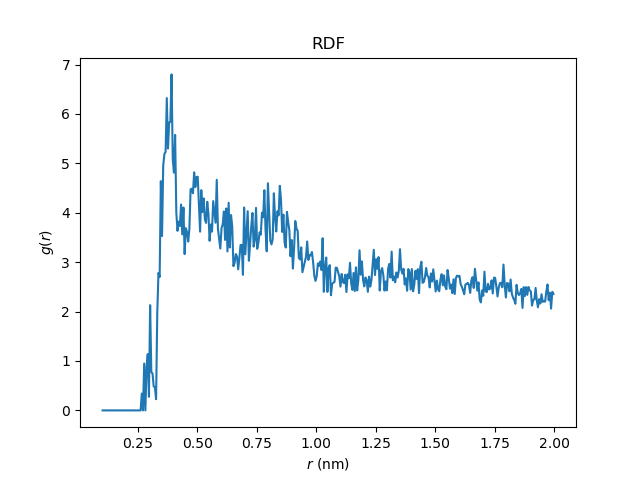

In [9]:
# trying to show image from the correct path
correct_rdf_path = agent.path_registry.ckpt_figures + "/rdf_" + '1HBI_145025' + ".png"
assert os.path.exists(correct_rdf_path)

from IPython.display import Image
Image(filename=correct_rdf_path)

/gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_62/figures/rdf_3LHB_145028.png


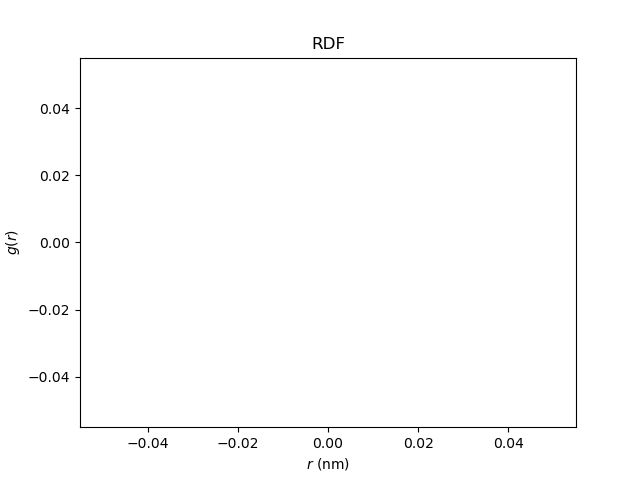

In [8]:
# trying to show image from the correct path
correct_rdf_path = agent.path_registry.ckpt_figures + "/rdf_" + '3LHB_145028' + ".png"
assert os.path.exists(correct_rdf_path)

from IPython.display import Image
Image(filename=correct_rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Completed without Hallucination ✅
### Logic make sense ✅
### Correct Answer  ❌